In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Research data files
SP = "Stock_Data/Stock_Data.csv"

# Read the data 
SP_data = pd.read_csv(SP)   # S&P daily price data for 2019 and 2020

In [2]:
# Display S&P 500 stock price dataframe for preview.
SP_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2019,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
1,1/3/2019,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2,1/4/2019,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
3,1/7/2019,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
4,1/8/2019,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000
...,...,...,...,...,...,...,...
486,12/4/2020,3670.939941,3699.199951,3670.939941,3699.120117,3699.120117,5086370000
487,12/7/2020,3694.729980,3697.409912,3678.879883,3691.959961,3691.959961,4788560000
488,12/8/2020,3683.050049,3708.449951,3678.830078,3702.250000,3702.250000,4549670000
489,12/9/2020,3705.979980,3712.389893,3660.540039,3672.820068,3672.820068,5209940000


In [3]:
# Calculate Daily Average Price from the day's High and Low price.
SP_data["Avg Price"] = (SP_data["High"] + SP_data["Low"])/2

# Display S&P 500 stock price dataframe
SP_data

,Date,Open,High,Low,Close,Adj Close,Volume,Avg Price
0,1/2/2019,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,2493.479981
1,1/3/2019,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,2468.549927
2,1/4/2019,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,2506.200073
3,1/7/2019,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,2545.359986
4,1/8/2019,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,2563.690064
...,...,...,...,...,...,...,...,...
486,12/4/2020,3670.939941,3699.199951,3670.939941,3699.120117,3699.120117,5086370000,3685.069946
487,12/7/2020,3694.729980,3697.409912,3678.879883,3691.959961,3691.959961,4788560000,3688.144897
488,12/8/2020,3683.050049,3708.449951,3678.830078,3702.250000,3702.250000,4549670000,3693.640014
489,12/9/2020,3705.979980,3712.389893,3660.540039,3672.820068,3672.820068,5209940000,3686.464966


In [4]:
# Remove S&P data beyond the end of the 3Q 2020
SP_data['Date'] = pd.to_datetime(SP_data['Date'])

SP_data = SP_data[SP_data['Date'] <= '10/1/2020']

SP_data

,Date,Open,High,Low,Close,Adj Close,Volume,Avg Price
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,2493.479981
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,2468.549927
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,2506.200073
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,2545.359986
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,2563.690064
...,...,...,...,...,...,...,...,...
437,2020-09-25,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3792220000,3267.659912
438,2020-09-28,3333.899902,3360.739990,3332.909912,3351.600098,3351.600098,3946060000,3346.824951
439,2020-09-29,3350.919922,3357.919922,3327.540039,3335.469971,3335.469971,3651880000,3342.729981
440,2020-09-30,3341.209961,3393.560059,3340.469971,3363.000000,3363.000000,4722530000,3367.015015


In [5]:
# Remove unnecessary columns from source dataframe
SP_data = SP_data.drop(['Volume','Adj Close','Open','Close','Low','High'],axis=1)

# Display S&P 500 stock price dataframe
SP_data

,Date,Avg Price
0,2019-01-02,2493.479981
1,2019-01-03,2468.549927
2,2019-01-04,2506.200073
3,2019-01-07,2545.359986
4,2019-01-08,2563.690064
...,...,...
437,2020-09-25,3267.659912
438,2020-09-28,3346.824951
439,2020-09-29,3342.729981
440,2020-09-30,3367.015015


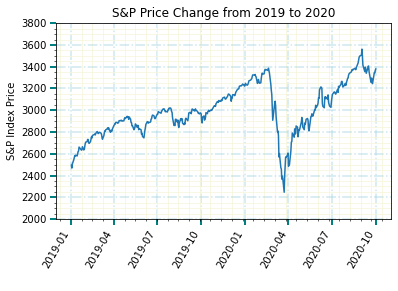

In [7]:
minvalue = SP_data.loc[SP_data['Avg Price'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = SP_data.loc[SP_data['Avg Price'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
SP_data.plot.line(x='Date', y='Avg Price', legend = False, rot=60, title="S&P Price Change from 2019 to 2020");

# Sets the y limits
plt.ylim(2000, 3800)

# Provides labels
plt.xlabel(" ")
plt.ylabel("S&P Index Price")

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/S&P Price Change.png')

plt.show(block=True)